# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Revanantyo Dwigantara
- **Email:** revanandwi@gmail.com
- **ID Dicoding:** reprandolvski

## Menentukan Pertanyaan Bisnis

- Bagaimana tren persebaran pelanggan yang kita miliki?
- Berapa banyak pelanggan yang menyewa sepeda dalam beberapa tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [2]:
!git clone https://github.com/xmall75/dicoding-analisis-data.git

Cloning into 'dicoding-analisis-data'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 275.01 KiB | 11.00 MiB/s, done.


In [3]:
!unzip dicoding-analisis-data/Bike-sharing-dataset.zip

Archive:  dicoding-analisis-data/Bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [4]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Melihat informasi pada dataset dan lakukan checking apakah ada missing values atau ketidaksesuaian tipe data.

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sepertinya terdapat ketidaksesuaian pada **tipe data** feature *date*. Kita akan koreksi nanti di langkah data cleaning.

Melihat apakah terdapat data yang terduplikasi.

In [8]:
print("Daily:", day_df.duplicated().sum())
print("Hourly:", hour_df.duplicated().sum())

Daily: 0
Hourly: 0


Melihat ringkasan statistik pada dataset.

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari ringkasan statistik di atas tampak tidak ada yang aneh. Sekarang mari kita identifikasi masalah yang ada pada dataset.

<table>
  <tr>
    <th>
      *
    </th>
    <th>
      Tipe Data
    </th>
    <th>
      Missing Values
    </th>
    <th>
      Duplicated Data
    </th>
    <th>
      Inaccurate Values
    </th>
  </tr>
  <tr>
    <td>
      day_df
    </td>
    <td>
      Tipe data yang salah pada feature <i>date</i>
    </td>
    <td>
      -
    </td>
    <td>
      -
    </td>
    <td>
      -
    </td>
  </tr>
  <tr>
    <td>
      hour_df
    </td>
    <td>
      Tipe data yang salah pada feature <i>date</i>
    </td>
    <td>
      -
    </td>
    <td>
      -
    </td>
    <td>
      -
    </td>
  </tr>
</table>


### Cleaning Data

Hal pertama yang sepertinya perlu kita rapikan adalah nama features. Beberapa tampak tidak teratur, mari kita rapikan!

In [11]:
columns_name = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'temp': 'temperature', 'hr': 'hour', 'hum': 'humidity','cnt': 'total'}

day_df.rename(columns=columns_name, inplace=True)
hour_df.rename(columns=columns_name, inplace=True)

In [12]:
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Selanjutnya, kita akan mengubah tipe data pada feature *date* menjadi datetime.

In [14]:
day_df['date'] = pd.to_datetime(day_df['date'])
hour_df['date'] = pd.to_datetime(hour_df['date'])

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    int64         
 3   year         731 non-null    int64         
 4   month        731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    int64         
 8   weathersit   731 non-null    int64         
 9   temperature  731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  total        731 non-null    int64         
dtypes: datet

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   year         17379 non-null  int64         
 4   month        17379 non-null  int64         
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weathersit   17379 non-null  int64         
 10  temperature  17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  tota

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
hour_df.shape

(17379, 17)

Jika kita lihat, **hour_df** merupakan dataset dalam bentuk per jam. Sedangkan, **day_df** merupakan dataset dalam bentuk harian. Jika kita lakukan pengelompokkan pada **hour_df** berdasarkan tanggal, kita akan dapatkan nilai *registered*, *casual*, dan *cnt* sama dengan **day_df**

In [18]:
hour_df.groupby('date')['registered'].sum()

date
2011-01-01     654
2011-01-02     670
2011-01-03    1229
2011-01-04    1454
2011-01-05    1518
              ... 
2012-12-27    1867
2012-12-28    2451
2012-12-29    1182
2012-12-30    1432
2012-12-31    2290
Name: registered, Length: 731, dtype: int64

Beberapa features sepertinya bisa kita ubah menjadi *categorical* seperti **season**, **month**, dan **weekday**. Untuk feature **year** kita bisa ubah menjadi data numerik yang mudah dibaca.

In [19]:
# mengubah year menjadi lebih rapi

def to_year(year):
  if year == 0:
    prints = 2011
  elif year == 1:
    prints = 2012
  return prints

hour_df['year'] = hour_df['year'].apply(to_year)

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
# mengubah season menjadi categorical

hour_df['season'] = hour_df['season'].astype('category')
hour_df['season'] = hour_df['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})
hour_df['season'].unique()

['Winter', 'Spring', 'Summer', 'Autumn']
Categories (4, object): ['Winter', 'Spring', 'Summer', 'Autumn']

In [21]:
# mengubah month menjadi categorical

months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
          6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
          11: 'November', 12: 'December'}

hour_df['month'] = hour_df['month'].astype('category')
hour_df['month'] = hour_df['month'].cat.rename_categories(months)
hour_df['month'].unique()

['January', 'February', 'March', 'April', 'May', ..., 'August', 'September', 'October', 'November', 'December']
Length: 12
Categories (12, object): ['January', 'February', 'March', 'April', ..., 'September', 'October',
                          'November', 'December']

In [22]:
# mengubah weekday menjadi categorical

hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].cat.rename_categories({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
hour_df['weekday'].unique()

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
Categories (7, object): ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                         'Sunday']

In [23]:
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Winter,2011,January,0,0,Sunday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Sunday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Sunday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Sunday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Sunday,0,1,0.24,0.2879,0.75,0.0,0,1,1


Kita coba lihat persebaran pelanggan berdasarkan musim.

In [24]:
hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "total": ["max", "min", "sum"]
})

instant total             
       nunique   max min      sum
season                           
Winter    4242   801   1   471348
Spring    4409   957   1   918589
Summer    4496   977   1  1061129
Autumn    4232   967   1   841613

Ternyata, musim panas menjadi musim dengan pelanggan terbanyak. Hal ini masuk akal karena anak sekolah libur pada musim panas. Musim dingin menjadi musim dengan pelanggan paling sedikit.

Sekarang kita lihat persebaran pelanggan berdasarkan hari dan bulan.

In [25]:
hour_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,instant,total
weekday,,
Saturday,2487,487790
Friday,2471,485395
Sunday,2512,477807
Thursday,2475,473048
Wednesday,2453,469109
Tuesday,2479,455503
Monday,2502,444027


Pelanggan terbanyak ada pada weekend.

In [26]:
hour_df.groupby(by="month").agg({
    "instant": "nunique",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,instant,total
month,,
August,1475,351194
June,1440,346342
September,1437,345991
July,1488,344948
May,1488,331686
October,1451,322352
April,1437,269094
November,1437,254831
March,1473,228920


Pelanggan terbanyak ada pada bulan-bulan di musim panas.

Selanjutnya, mari kita coba lihat preferensi pelanggan berdasarkan bulan dan hari menggunakan kode di bawah ini.

In [27]:
hour_df.groupby(by=["month", "weekday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).head(21)

casual  registered  total
month    weekday                             
January  Monday       3049       15110  18159
         Tuesday      1244       18024  19268
         Wednesday    1498       21612  23110
         Thursday      982       16127  17109
         Friday       1007       19099  20106
         Saturday     1180       18392  19572
         Sunday       3082       14527  17609
February Monday       3608       14372  17980
         Tuesday      1659       19176  20835
         Wednesday    1051       21541  22592
         Thursday     1495       23825  25320
         Friday       1410       21618  23028
         Saturday     2068       21397  23465
         Sunday       3672       14460  18132
March    Monday       8722       17686  26408
         Tuesday      4044       24321  28365
         Wednesday    4084       28082  32166
         Thursday     4339       28691  33030
         Friday       4922       33248  38170
         Saturday     6151       29181  35332
         Sunday      12182       23267  35449

## Visualization & Explanatory Analysis

Sebelum kita terjun untuk menjawab pertanyaan, mari kita lihat karakteristik dari data.

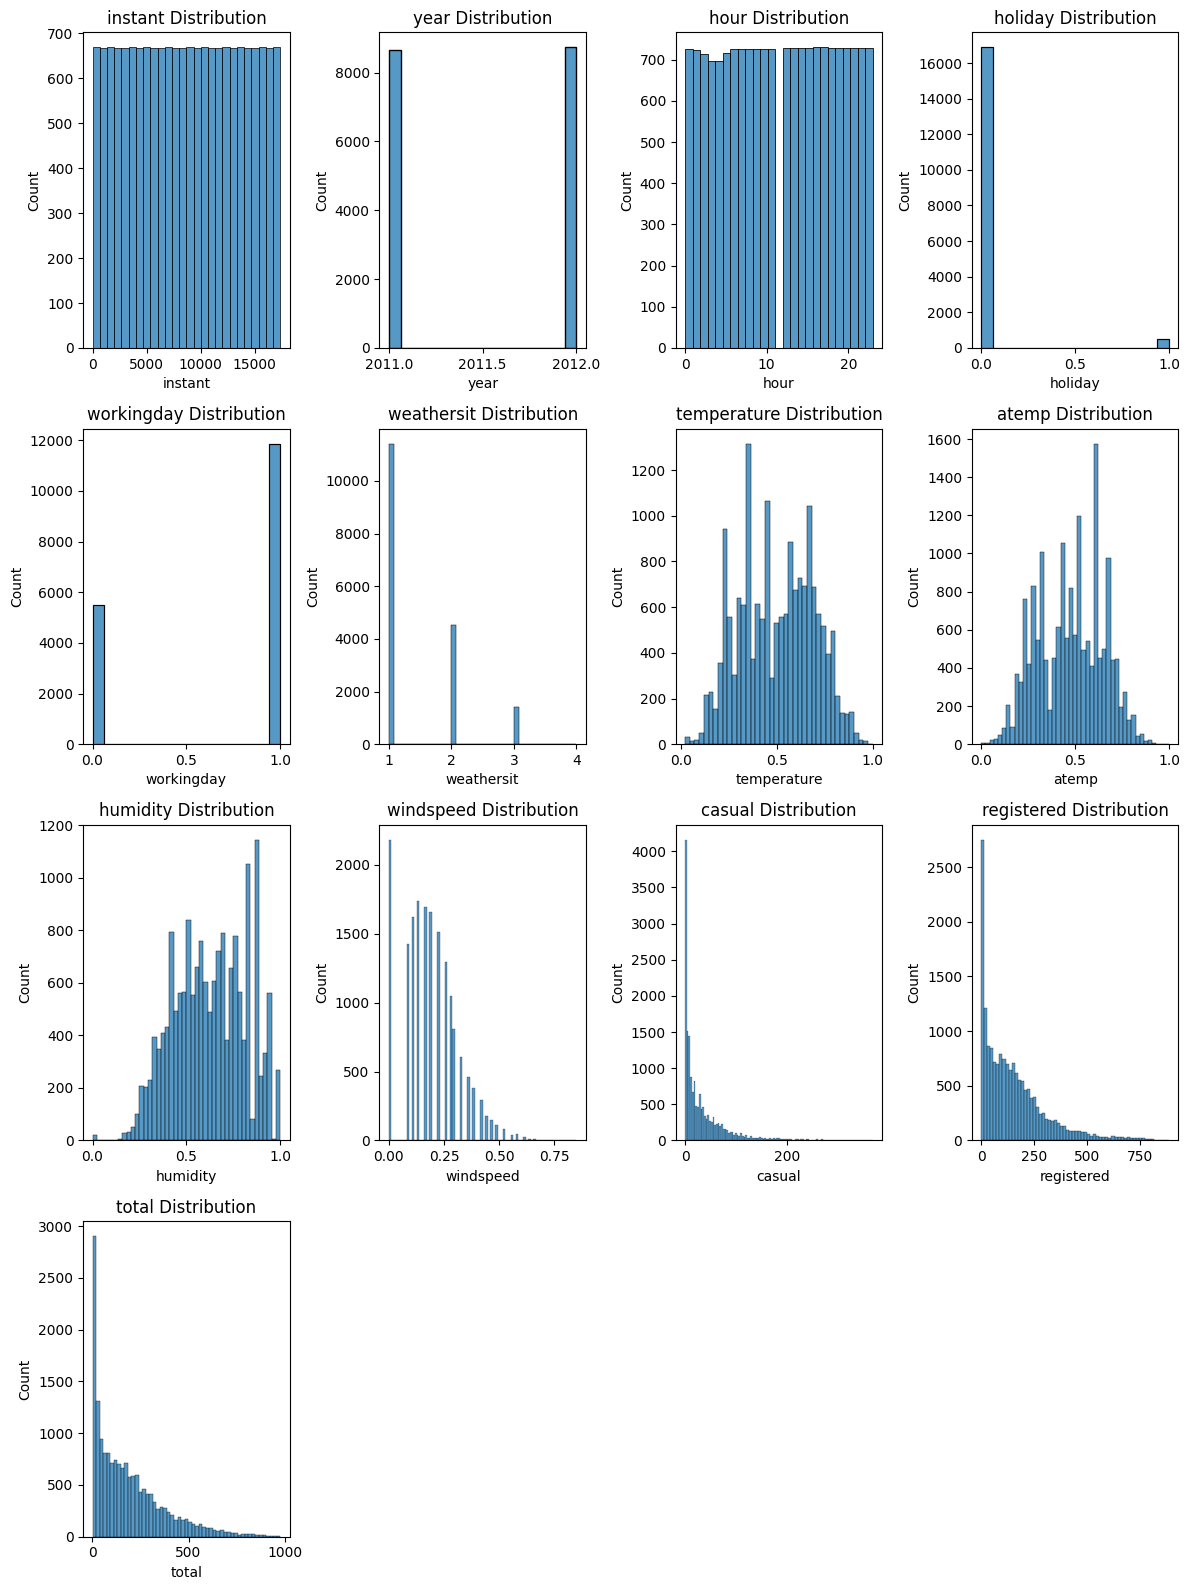

In [28]:
plt.figure(figsize=(12,16))
for i, j in enumerate(hour_df.describe().columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(x=hour_df[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.tight_layout()
plt.show()

Selanjutnya mari kita lihat nilai statistik dari setiap features menggunakan box plot.

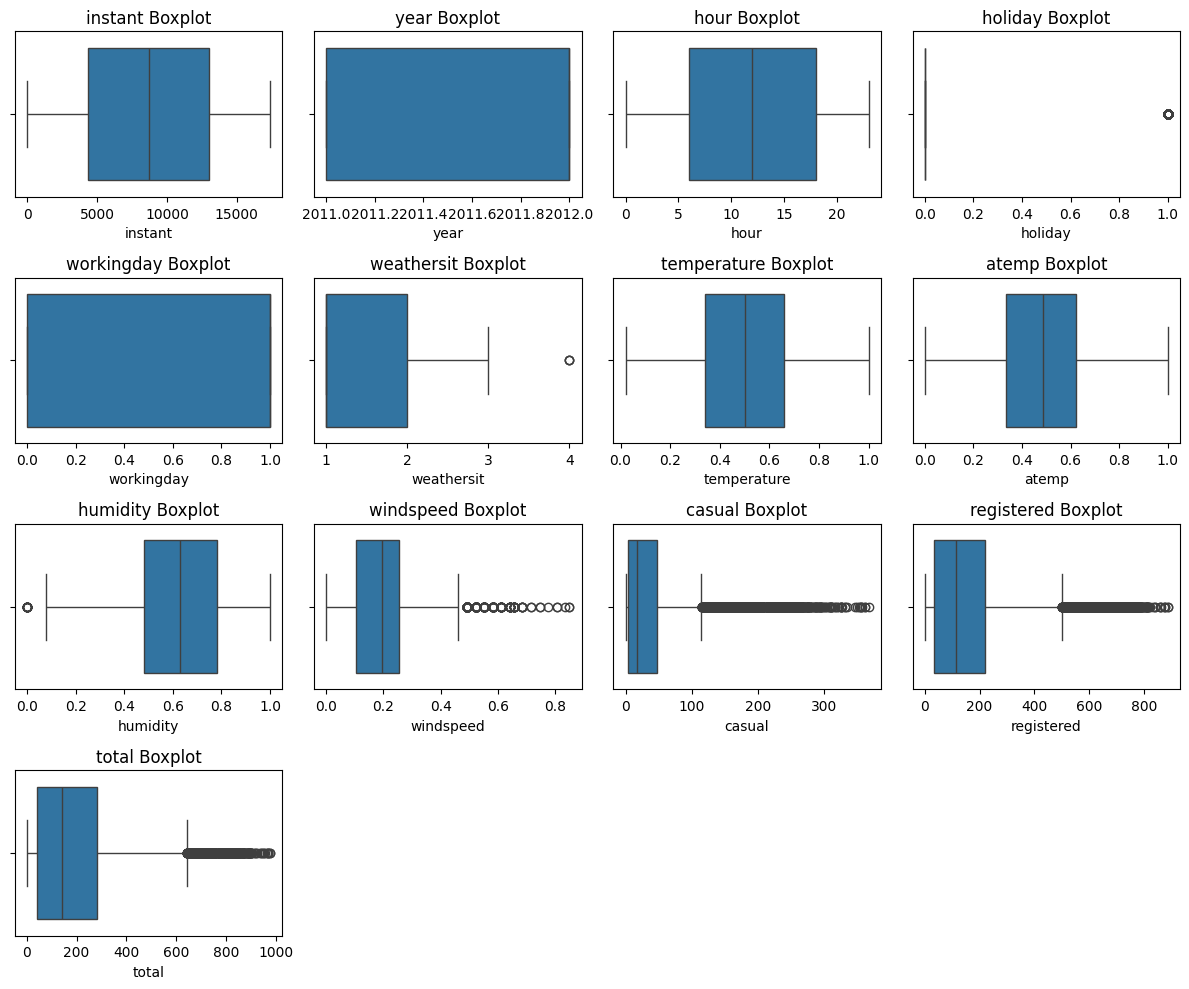

In [29]:
plt.figure(figsize=(12,10))
for i, j in enumerate(hour_df.describe().columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=hour_df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

windspeed, casual, registered, dan total memiliki outlier yang sangat tinggi. Tetapi, kita tidak akan menghapusnya, melainkan kita akan lihat korelasi antara features-features tersebut.

Karena banyaknya numerical features, kita akan lakukan multivariate analysis untuk menampilkan scatter plot pada tiap features.


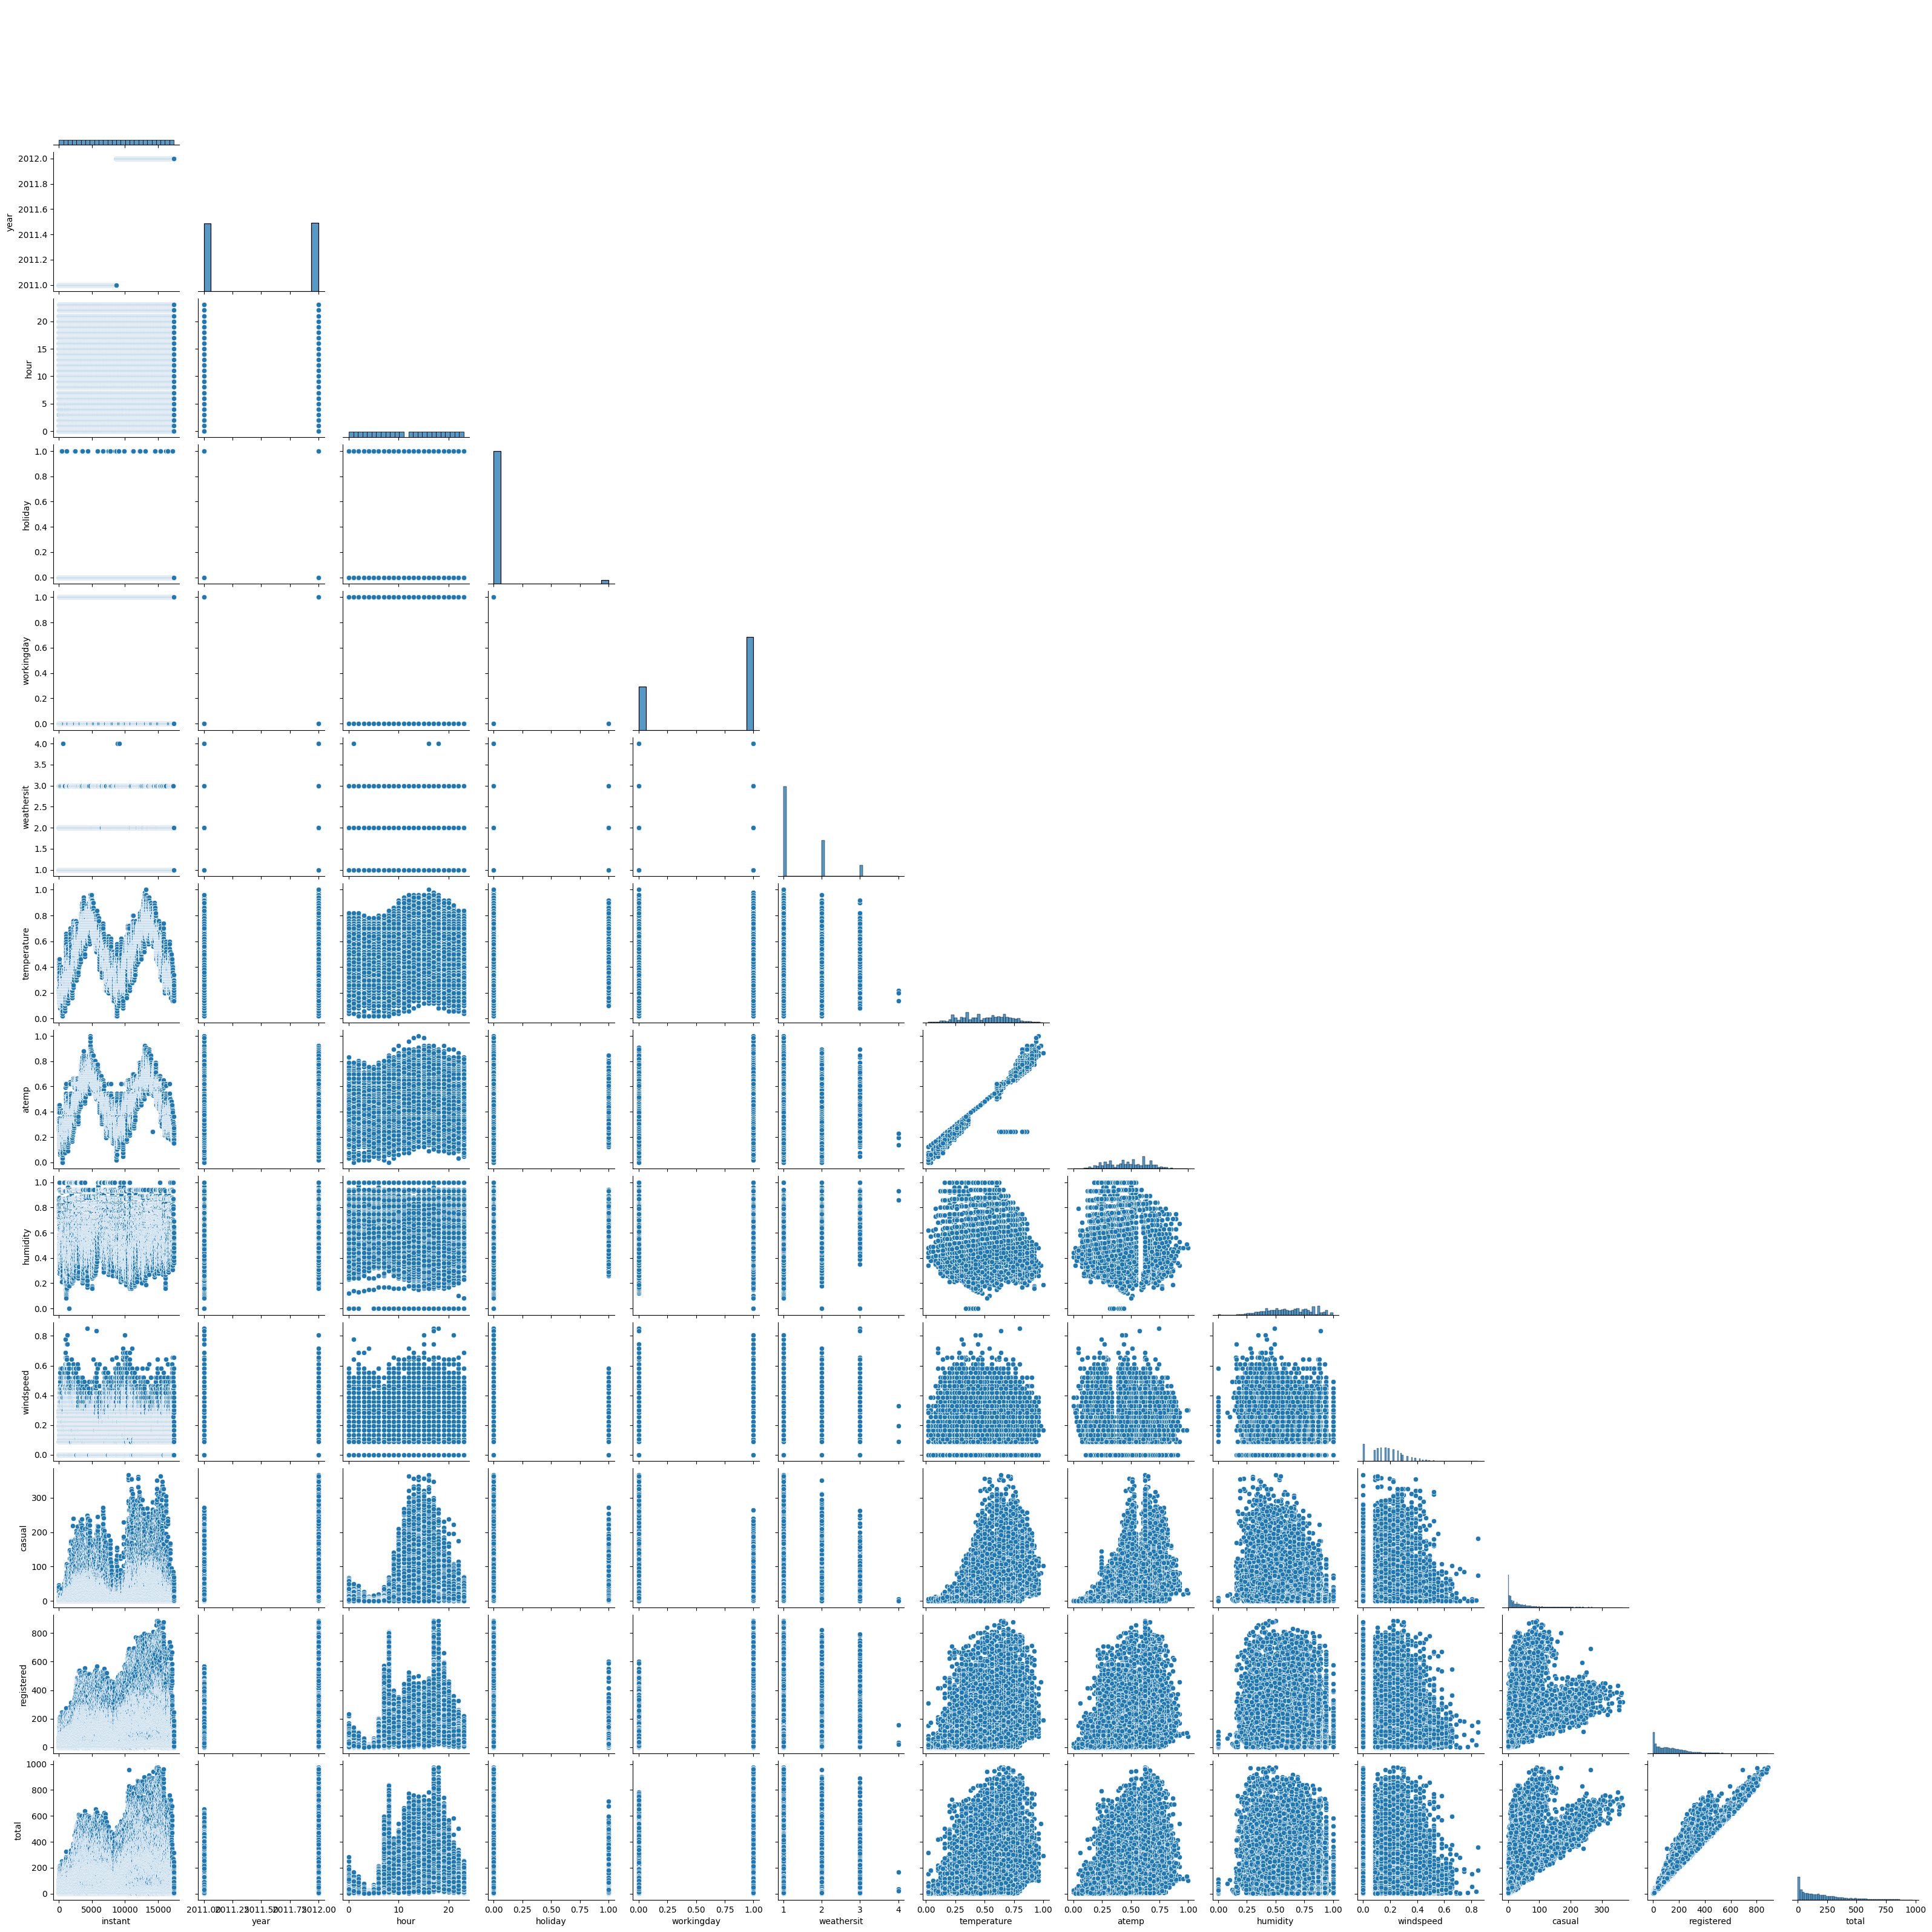

In [30]:
pairplot = sns.pairplot(hour_df, corner=True)
plt.show(pairplot)

Kita dapatkan features yang berkorelasi positif:
- Total vs. Casual
- Total vs. Registered
- Casual vs. Registered

Kita juga bisa gunakan heatmap untuk melihat korelasi antar features.

<ipython-input-31-cf768a474a27>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_metrics=hour_df.corr()


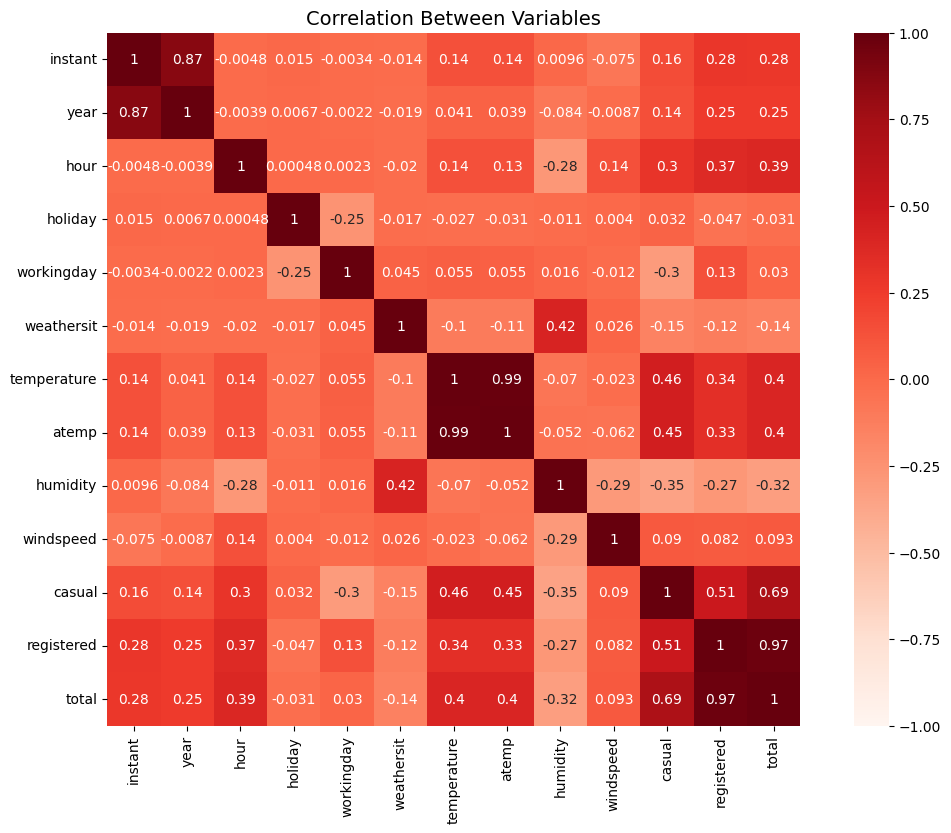

In [31]:
correlation_metrics=hour_df.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='Reds')
plt.title('Correlation Between Variables', size=14)
plt.show()

Dari diagram heatmap kita dapatkan **registered** berkorelasi tinggi dengan **total**.

Kita lakukan filter untuk menghilangkan outlier. Kita gunakan median untuk menghilangkan outlier karena feature total memiliki bentuk *skewed*.

In [32]:
hour_df_filter = hour_df[hour_df.total < hour_df.total.median()]
hour_df_filter

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Winter,2011,January,0,0,Sunday,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,2012,December,19,0,Tuesday,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Winter,2012,December,20,0,Tuesday,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Winter,2012,December,21,0,Tuesday,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Winter,2012,December,22,0,Tuesday,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [33]:
hour_df_filter = hour_df_filter[hour_df_filter.registered < hour_df_filter.registered.median()]
hour_df_filter

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Winter,2011,January,0,0,Sunday,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,17357,2012-12-31,Winter,2012,December,1,0,Tuesday,1,1,0.18,0.1818,0.55,0.1940,6,13,19
17357,17358,2012-12-31,Winter,2012,December,2,0,Tuesday,1,1,0.16,0.1667,0.59,0.1642,3,8,11
17358,17359,2012-12-31,Winter,2012,December,3,0,Tuesday,1,1,0.16,0.1818,0.59,0.1045,0,1,1
17359,17360,2012-12-31,Winter,2012,December,4,0,Tuesday,1,1,0.14,0.1667,0.69,0.1045,0,3,3


Mari kita lihat bentuk box plot dan histogram dari features total dan registered.

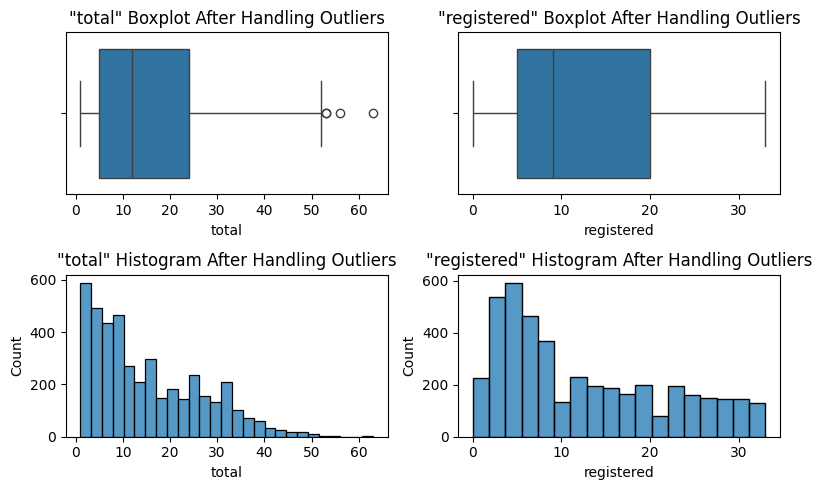

In [36]:
fig = plt.figure(figsize=(8,5))
plt.subplot(2,2,1)
sns.boxplot(x=hour_df_filter["total"])
plt.title('"total" Boxplot After Handling Outliers')
plt.tight_layout()
plt.subplot(2,2,2)
sns.boxplot(x=hour_df_filter["registered"])
plt.title('"registered" Boxplot After Handling Outliers')
plt.tight_layout()
plt.subplot(2,2,3)
sns.histplot(x=hour_df_filter["total"])
plt.title('"total" Histogram After Handling Outliers')
plt.tight_layout()
plt.subplot(2,2,4)
sns.histplot(x=hour_df_filter["registered"])
plt.title('"registered" Histogram After Handling Outliers')
plt.tight_layout()
plt.show()

Outlier sudah diatasi, dengan ini kita bisa melanjutkan proses selanjutnya.

Di sini kita akan melakukan proses clustering. Clustering adalah proses pengelompokkan data berdasarkan kemiripannya. Namun sebelum itu, kita akan buat dataframe baru khusus untuk clustering.

In [66]:
df_cluster = hour_df_filter[['season', 'weekday', 'month', 'total', 'registered']].reset_index()
df_cluster.drop('index', inplace=True, axis=1)
df_cluster

,season,weekday,month,total,registered
0,Winter,Sunday,January,16,13
1,Winter,Sunday,January,40,32
2,Winter,Sunday,January,32,27
3,Winter,Sunday,January,13,10
4,Winter,Sunday,January,1,1
...,...,...,...,...,...
4302,Winter,Tuesday,December,19,13
4303,Winter,Tuesday,December,11,8
4304,Winter,Tuesday,December,1,1
4305,Winter,Tuesday,December,3,3


Kita coba lihat korelasi antara features total dan registered menggunakan scatterplot dan hexbin.

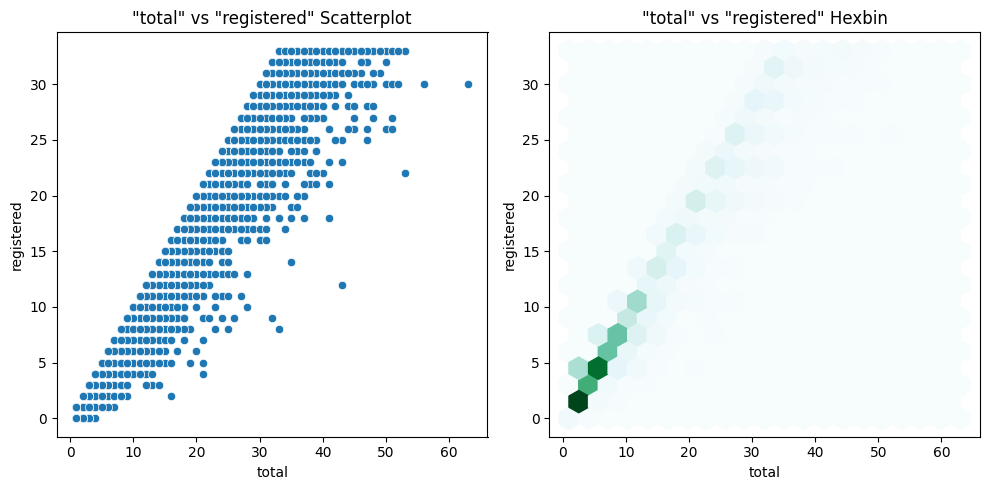

In [67]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=hour_df_filter["total"], y=hour_df_filter["registered"])
plt.title('"total" vs "registered" Scatterplot')
plt.tight_layout()
plt.subplot(1,2,2)
plt.hexbin(x=hour_df_filter["total"], y=hour_df_filter["registered"], gridsize = 20, cmap ='BuGn')
plt.title('"total" vs "registered" Hexbin')
plt.xlabel('total')
plt.ylabel('registered')
plt.tight_layout()
plt.show()

Selanjutnya kita dapat melakukan scaling dengan menggunakan Standard Scaler dari Scikit-Learn untuk membuat nilai kedua features seimbang dan tidak berat sebelah.

In [68]:
scaler = StandardScaler()
data_scale = np.array(hour_df_filter[['total', 'registered']])
scaled = scaler.fit_transform(data_scale.astype(float))
scaled_df = pd.DataFrame(scaled, columns=['total', 'registered'])

scaled_df

,total,registered
0,0.078646,0.066099
1,2.173870,2.100339
2,1.475462,1.565013
3,-0.183257,-0.255097
4,-1.230869,-1.218685
...,...,...
4302,0.340549,0.066099
4303,-0.357859,-0.469228
4304,-1.230869,-1.218685
4305,-1.056267,-1.004554


Kita coba lihat lagi korelasi antar features setelah dilakukan scaling.

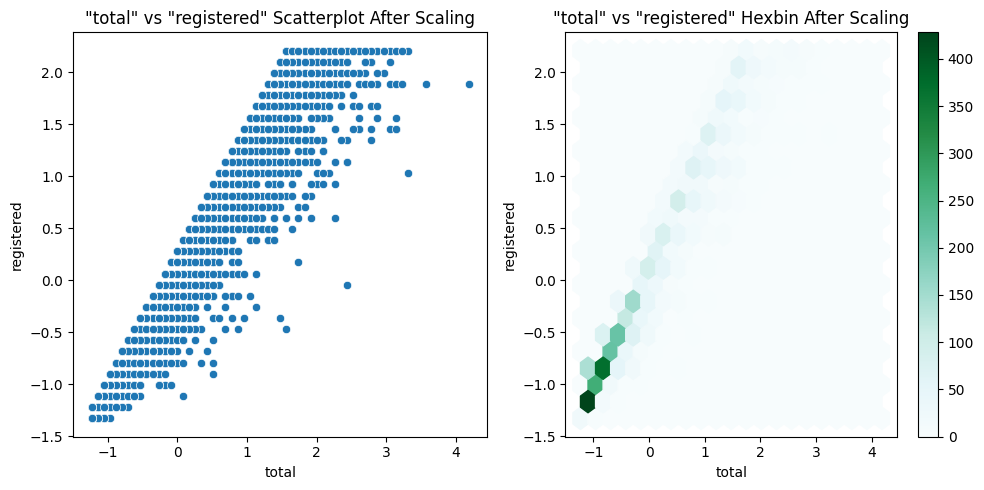

In [69]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=scaled_df["total"], y=scaled_df["registered"])
plt.title('"total" vs "registered" Scatterplot After Scaling')
plt.tight_layout()
plt.subplot(1,2,2)
hb = plt.hexbin(x=scaled_df["total"], y=scaled_df["registered"], gridsize = 20, cmap ='BuGn')
cb = plt.colorbar(hb)
plt.title('"total" vs "registered" Hexbin After Scaling')
plt.xlabel('total')
plt.ylabel('registered')
plt.tight_layout()
plt.show()

Selanjutnya kita bisa melanjutkan untuk menentukan nilai K untuk K-Means Clustering. Kita bisa menggunakan metode Elbow untuk menentukan nilai K.

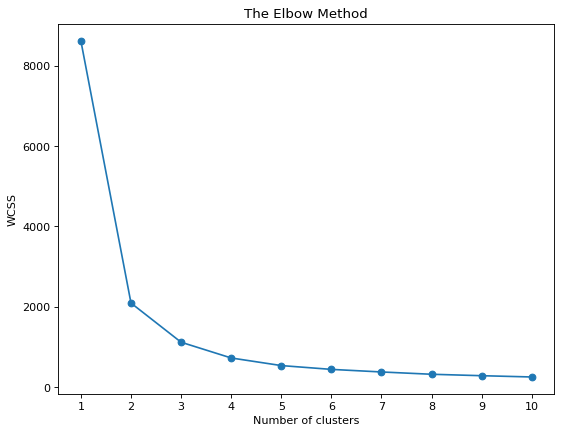

In [70]:
wcss=[]
k_range = range(1,11)
for i in k_range:
    kmeans = KMeans(n_clusters=i, n_init='auto', init='k-means++', random_state=1337)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plt.plot(k_range, wcss, marker='o')

plt.xticks(k_range)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Pada plot di atas terlihat ketika nilai K mencapai 3, K tidak lagi mengalami penurunan yang signifikan. Ini berarti kita bisa menggunakan nilai 3 sebagai nilai K kita atau nilai cluster kita.

In [71]:
kmeans_3 = KMeans(n_clusters=3, n_init='auto', random_state=1337)
kmeans_3.fit(scaled_df)
kmeans_3.labels_

array([1, 0, 0, ..., 2, 2, 2], dtype=int32)

Proses clustering selesai, saatnya kita masukkan ke dalam dataset.

In [72]:
df_cluster['cluster_id'] = kmeans_3.labels_
df_cluster.head()

,season,weekday,month,total,registered,cluster_id
0,Winter,Sunday,January,16,13,1
1,Winter,Sunday,January,40,32,0
2,Winter,Sunday,January,32,27,0
3,Winter,Sunday,January,13,10,1
4,Winter,Sunday,January,1,1,2


In [73]:
df_cluster.cluster_id.value_counts(ascending=True)

0     989
1    1125
2    2193
Name: cluster_id, dtype: int64

Untuk memahami hasil dari clustering, kita akan lakukan scatterplot.

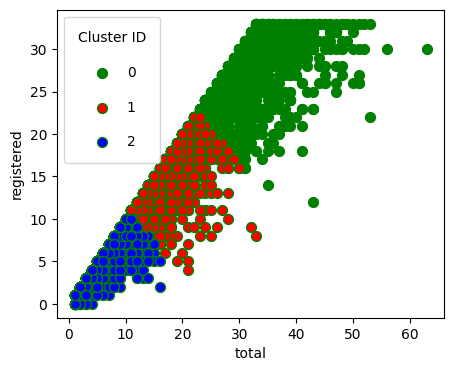

In [74]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(df_cluster.total[df_cluster.cluster_id == 0], df_cluster['registered'][df_cluster.cluster_id == 0], color = 'green', s=50, edgecolor = 'green', label= '0')
plt.scatter(df_cluster.total[df_cluster.cluster_id == 1], df_cluster['registered'][df_cluster.cluster_id == 1], color = 'red', s=50, edgecolor = 'green', label = '1')
plt.scatter(df_cluster.total[df_cluster.cluster_id == 2], df_cluster['registered'][df_cluster.cluster_id == 2], color = 'blue', s=50, edgecolor = 'green', label = '2')

plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1)
plt.xlabel('total')
plt.ylabel('registered')
plt.show()

Kita akan coba lihat cluster 0, untuk mendapatkan data pelanggan tertinggi dan cluster 2 untuk data terendah.

In [93]:
cluster0 = df_cluster[df_cluster.cluster_id == 0]
cluster1 = df_cluster[df_cluster.cluster_id == 1]
cluster2 = df_cluster[df_cluster.cluster_id == 2]
cluster2

,season,weekday,month,total,registered,cluster_id
4,Winter,Sunday,January,1,1,2
5,Winter,Sunday,January,1,1,2
6,Winter,Sunday,January,2,0,2
7,Winter,Sunday,January,3,2,2
8,Winter,Sunday,January,8,7,2
...,...,...,...,...,...,...
4297,Winter,Monday,December,8,7,2
4303,Winter,Tuesday,December,11,8,2
4304,Winter,Tuesday,December,1,1,2
4305,Winter,Tuesday,December,3,3,2


### Pertanyaan 1:

### Bagaimana tren persebaran pelanggan yang kita miliki?

Persebaran pelanggan berdasarkan musim dengan cluster 2 (cluster dengan data terendah).

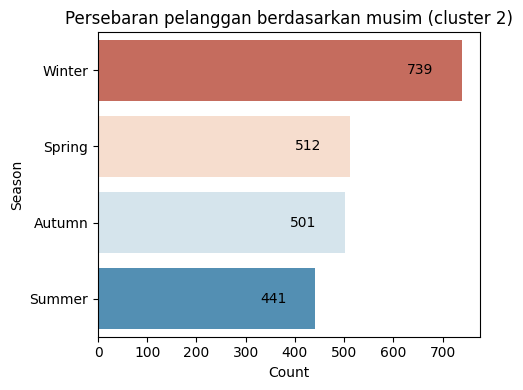

In [95]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.title('Persebaran pelanggan berdasarkan musim (cluster 2)')
plt.xlabel('Count')
plt.ylabel('Season')

sns.barplot(y=cluster2['season'].value_counts().keys().to_list(), hue=cluster2['season'].value_counts().keys().to_list(), x=cluster2['season'].value_counts().to_list(), palette='RdBu')

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(-30, 0), textcoords='offset points')


plt.tight_layout()
plt.show()

Mayoritas musim dingin berada pada cluster2, hal ini masuk akal karena musim dingin menjadi musim dengan pelanggan paling sedikit. Sedangkan, musim panas menjadi musim yang paling sedikit berada di cluster 2, ini bisa diartikan bahwa musim panas menjadi salah satu musim favorit untuk menyewa sepeda.

Persebaran pelanggan berdasarkan bulan dengan cluster 2 (cluster dengan data terendah)

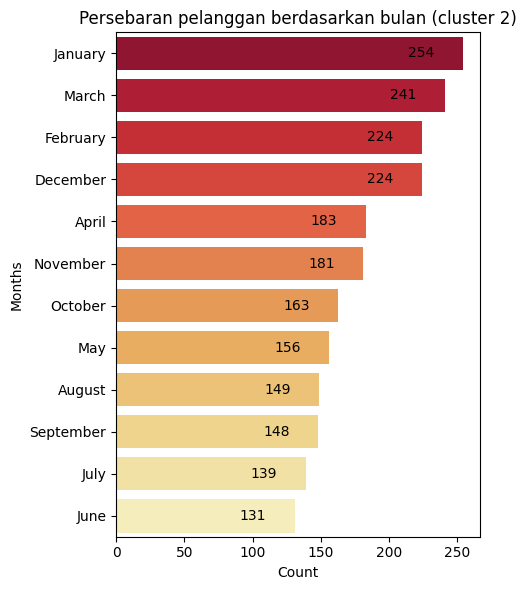

In [98]:
fig, ax = plt.subplots(figsize=(5, 6))
plt.title('Persebaran pelanggan berdasarkan bulan (cluster 2)')
plt.xlabel('Count')
plt.ylabel('Months')

sns.barplot(y=cluster2['month'].value_counts().keys().to_list(), hue=cluster2['month'].value_counts().keys().to_list(), x=cluster2['month'].value_counts().to_list(), palette='YlOrRd_r')

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(-30, 0), textcoords='offset points')


plt.tight_layout()
plt.show()

Persebaran pelanggan berdasarkan hari cluster 2 (cluster dengan data terendah)

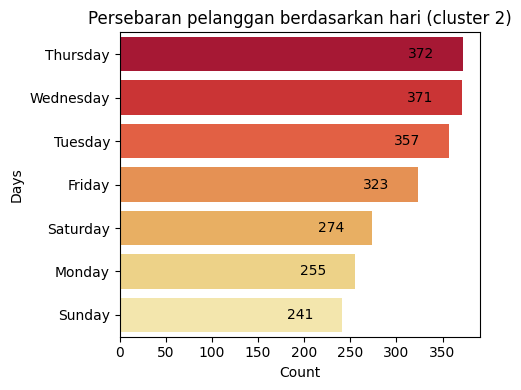

In [100]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.title('Persebaran pelanggan berdasarkan hari (cluster 2)')
plt.xlabel('Count')
plt.ylabel('Days')

sns.barplot(y=cluster2['weekday'].value_counts().keys().to_list(), hue=cluster2['weekday'].value_counts().keys().to_list(), x=cluster2['weekday'].value_counts().to_list(), palette='YlOrRd_r')

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(-30, 0), textcoords='offset points')


plt.tight_layout()
plt.show()

### Pertanyaan 2:

### Berapa banyak pelanggan yang menyewa sepeda dalam beberapa tahun terakhir?

<Axes: title={'center': 'Pelanggan beberapa tahun terakhir'}, xlabel='year', ylabel='Count'>

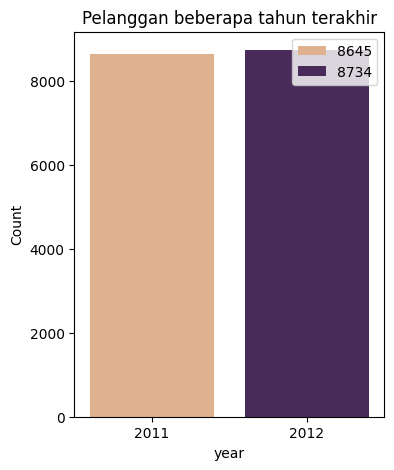

In [129]:
fig = plt.figure(figsize=(4, 5))
plt.title('Pelanggan beberapa tahun terakhir')
plt.xlabel('year')
plt.ylabel('Count')
sns.barplot(x=hour_df['year'].value_counts().keys().to_list(), hue=hour_df['year'].value_counts().to_list(), y=hour_df['year'].value_counts().to_list(), palette='flare')

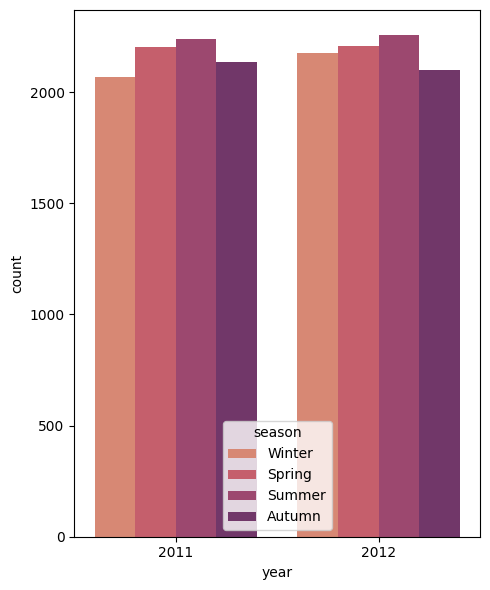

In [134]:
fig, ax = plt.subplots(figsize = (5, 6))

sns.countplot(x='year', hue = 'season', data = hour_df, palette='flare')

plt.tight_layout()
plt.show()

## Conclusion

- Dari data yang telah diolah, bisa kita simpulkan bahwa banyak pelanggan menyewa sepeda pada musim panas, karena di musim ini adalah musim di mana anak sekolah diliburkan. Lalu, musim dengan pelanggan paling sedikit adalah musim dingin.
- Kesimpulan yang bisa diambil dari pengolahan data di atas, pelanggan selama beberapa tahun terakhir yaitu tahun 2011 hingga 2012 mengalami peningkatan. Bisa dilihat pada visualisasi bar plot bahwa kenaikan pelanggan tidak terlalu signifikan. Pelanggan masih mendominasi pada musim panas. Tetapi, terdapat penurunan pelanggan pada musim gugur tahun 2011 dengan tahun 2012 dan kenaikan pada musim dingin tahun 2011 dengan tahun 2012.